## Lab #1

In [2]:
from __future__ import division
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import matplotlib.pyplot as plt

In [3]:
os.chdir('C:/Users/gme2101/Desktop/Data Analysis Data') # change working directory
d = pd.read_csv("GSS.2006.csv")
d.head()

,vpsu,vstrat,adults,ballot,dateintv,famgen,form,formwt,gender1,hompop,...,away7,gender14,old14,relate14,relhh14,relhhd14,relsp14,where12,where6,where7
0,1,1957,1,3,316,2,1,1,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1957,2,2,630,1,2,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1957,2,2,314,2,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1957,1,1,313,1,2,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1957,3,1,322,2,2,1,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
for col in d.columns: 
    print(col) 

vpsu
vstrat
adults
ballot
dateintv
famgen
form
formwt
gender1
hompop
id
intage
intid
intyrs
mode
oversamp
phase
race
reg16
region
relate1
relhh1
relhhd1
respnum
rvisitor
sampcode
sample
sex
size
spaneng
srcbelt
version
visitors
wtss
wtssall
wtssnr
xnorcsiz
year
hispanic
rplace
degree
hefinfo
wrkstat
racecen1
marital
phone
comprend
coop
feeused
hhrace
lngthinv
educ
childs
ethnum
age
cohort
intrace1
attend
inthisp
hhtype
hhtype1
earnrs
whoelse6
whoelse1
whoelse2
whoelse3
whoelse4
whoelse5
partyid
relig
teens
preteen
babies
reliten
dwelling
vote04
mar1
zodiac
old1
fund
polviews
income
income06
wrkslf
isco681
isco88
occ80
prestg80
wrkgovt
sei
intethn
intsex
indus80
eth1
trust
realinc
coninc
ethnic
health
union
gender2
relate2
relhh2
relhhd2
wksub
wksup
old2
mar2
widowed
unrelat
born
saqsex
weekswrk
family16
relig16
res16
sibs
parborn
happy
mobile16
satfin
finalter
relactiv
relexper
savesoul
class
pray
relpersn
relexp
god
reborn
finrela
sprtprsn
rellife
pres04
bible
vote00
rotapple
blkwhite

1-- I am looking at how often work conflicts with family life.

In [4]:
d.jbintfam.value_counts()

3    364
4    293
5    206
2    101
1     51
dtype: int64

In [5]:
summary = d.jbintfam.describe()
summary = summary.transpose()
summary

count    1015.000000
mean        3.494581
std         1.075879
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: jbintfam, dtype: float64

In [6]:
my_tab = pd.crosstab(index=d["jbintfam"],  # Make a crosstab
                              columns="count")     
def compute_percentage(x):
      pct = float(x/my_tab['count'].sum()) * 100
      return round(pct, 2)

my_tab['percentage'] = my_tab.apply(compute_percentage, axis=1)

my_tab

col_0,count,percentage
jbintfam,,
1,51,5.02
2,101,9.95
3,364,35.86
4,293,28.87
5,206,20.30


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000191A5518>]], dtype=object)

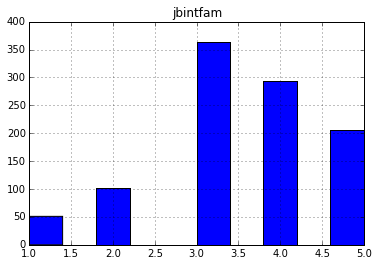

In [8]:
%matplotlib inline
d.hist(column='jbintfam')

2-- How many hours of work are associated with people who complain about work-life balance issues.

In [9]:
d.groupby(['jbintfam'])['hrs1'].mean()

jbintfam
1           49.955556
2           46.336957
3           44.540936
4           39.894161
5           38.345550
Name: hrs1, dtype: float64

In [10]:
d.groupby(['jbintfam'])['hrs1'].std()

jbintfam
1           18.320326
2           10.937663
3           13.054693
4           11.514910
5           13.148783
Name: hrs1, dtype: float64

In [11]:
d.groupby(['jbintfam', 'sex'])['hrs1'].mean()

jbintfam  sex
1         1      57.724138
          2      35.875000
2         1      47.627119
          2      44.030303
3         1      46.558011
          2      42.273292
4         1      41.007194
          2      38.748148
5         1      40.141304
          2      36.676768
Name: hrs1, dtype: float64

In [12]:
d.groupby(['jbintfam', 'sex'])['hrs1'].count()

jbintfam  sex
1         1       29
          2       16
2         1       59
          2       33
3         1      181
          2      161
4         1      139
          2      135
5         1       92
          2       99
Name: hrs1, dtype: int64

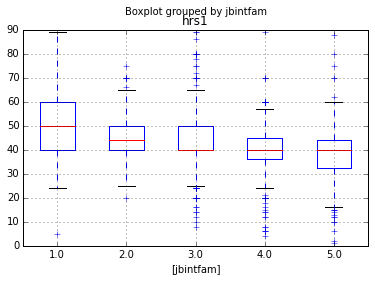

In [13]:
%matplotlib inline
d.boxplot(column='hrs1', by=['jbintfam'])

3-- See what percent of full-time workers vs. part-time workers are "never" feeling conflicted by work (18% vs. 31%)

In [15]:
res = pd.crosstab(d.jbintfam, d.wrkstat)
res.astype('float').div(res.sum(axis=0), axis=1)

wrkstat,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
jbintfam,,,,,,,,
1,0.049140,0.051471,0.068966,0.000000,0,0.111111,0.0625,0.000000
2,0.109337,0.036765,0.103448,0.333333,0,0.111111,0.1250,0.000000
3,0.373464,0.279412,0.379310,0.333333,0,0.444444,0.2500,0.285714
4,0.285012,0.316176,0.379310,0.000000,0,0.222222,0.1875,0.285714
5,0.183047,0.316176,0.068966,0.333333,1,0.111111,0.3750,0.428571
